In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


sns.set()

In [2]:
cleaned_data = pd.read_csv('Datasets/Insurance_cleaned.csv')

cleaned_data.head()

,Unnamed: 0,Year of Observation,Insurance Period,Residential,Building Painted,Building Fenced,Garden,Settlement,Building Dimension,Building Type,Date Of Occupancy,Number of Windows,Geo Code,Claim
0,0,2013,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,290,1,1960,4,1053,0
1,1,2015,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,490,1,1850,4,1053,0
2,2,2014,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,595,1,1960,4,1053,0
3,3,2013,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,2840,1,1960,4,1053,0
4,4,2014,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,680,1,1800,3,1053,0


In [3]:
data = cleaned_data.copy()

# drop index
data = data.drop(['Unnamed: 0'], axis=1)
data.reset_index(drop=True, inplace=True)

data.head()

,Year of Observation,Insurance Period,Residential,Building Painted,Building Fenced,Garden,Settlement,Building Dimension,Building Type,Date Of Occupancy,Number of Windows,Geo Code,Claim
0,2013,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,290,1,1960,4,1053,0
1,2015,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,490,1,1850,4,1053,0
2,2014,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,595,1,1960,4,1053,0
3,2013,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,2840,1,1960,4,1053,0
4,2014,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,680,1,1800,3,1053,0


In [ ]:
data.tail()

In [ ]:
# descriptives 
data.describe()

Hypothesis 

1. Does Fenced Building Claim Insurance than Building Not Fenced?
2. Does Longer Insurance Period Claim Insurance than shorter Period?
3. Does Rural areas claim Insurance than Urban areas?
4. What is the Trend of insurance made over the years?
5. Does Residential Properties have longer Insurance Period?

In [12]:
# Visualize the Insurance Claimed between Fenced Building and Not Fenced Building 

Fenced_gb = data.groupby('Building Fenced')[['Claim','Building Fenced']].value_counts()
Fenced_gb

Building Fenced  Claim
Fenced           0        3531
                 1         901
Not Fenced       0        5032
                 1         731
dtype: int64

In [21]:
df_1 = pd.DataFrame({'Building Type': ['Fenced','Not Fenced'],'Claimed':[901,731], 'Not Claimed':[3531,5032]})
df_1

,Building Type,Claimed,Not Claimed
0,Fenced,901,3531
1,Not Fenced,731,5032


In [27]:
df_1.loc[0,['Claimed','Not Claimed']].values

array([901, 3531], dtype=object)

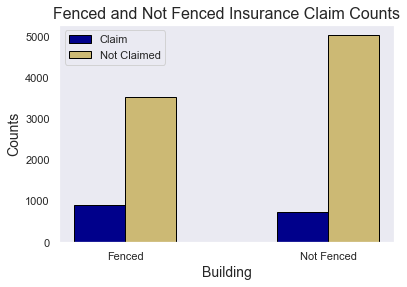

In [31]:
n = len(df_1)
r = np.arange(n)
width = 0.25

plt.bar(r,df_1['Claimed'], color = 'darkblue',
       width = width, edgecolor = 'black',label='Claim')
plt.bar(r + width,df_1['Not Claimed'], color='y',
       width = width, edgecolor = 'black',label='Not Claimed')

plt.xlabel('Building',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Fenced and Not Fenced Insurance Claim Counts',fontsize = 16)
plt.grid(False)
plt.xticks(r + width/2,['Fenced','Not Fenced'])
plt.legend()

plt.show()


According to the visuals 
Fenced Building does have higher insurance claim than Building Not Fenced 
The Bar chat also implies that whether a Building is fenced or not, it is not a strong determinant of insurance Claim

In [ ]:
# Insurance Claim Period 

df_2 = pd.DataFrame(data.groupby('Building Fenced')[['Claim','Building Fenced']].value_counts())

In [ ]:
df_1 = pd.DataFrame({'Building Type': ['Fenced','Not Fenced'],'Claimed':[901,731], 'Not Claimed':[3531,5032]})
df_1

# Univariate Analysis

In [4]:
data['Year of Observation'].value_counts()

2012    2707
2013    2578
2014    1927
2015    1550
2016    1433
Name: Year of Observation, dtype: int64

<AxesSubplot:title={'center':'Univariate Analysis Showing The Counts Of Insurance Made From 2013 - 2016'}, xlabel='Year of Observations', ylabel='Insurance Counts'>

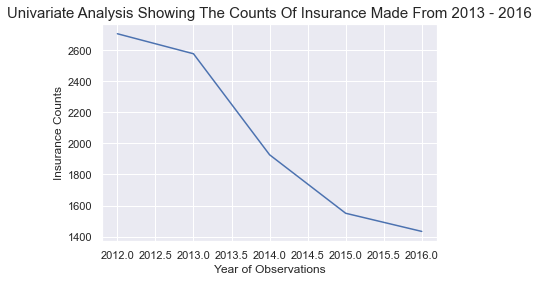

In [36]:
Year_of_observation = data['Year of Observation'].value_counts()

plt.title('Univariate Analysis Showing The Counts Of Insurance Made From 2013 - 2016', fontsize=15)
plt.xlabel('Year of Observations')
plt.ylabel("Insurance Counts")
sns.lineplot(x=Year_of_observation.index, y=Year_of_observation.values)

#plt.savefig('figures\CountsOfInsuranceMade')

Text(0.5, 1.0, 'The Percentage of Insured Properties Painted and Not-Painted')

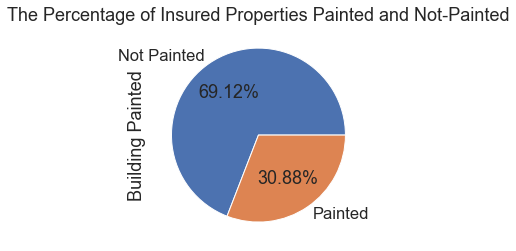

In [6]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,4))

data['Building Painted'].value_counts().plot(kind= "pie", autopct="%1.2f%%")
plt.title('The Percentage of Insured Properties Painted and Not-Painted',fontsize=18)


Text(0.5, 1.0, 'The Percentage Of Insured Properties With Gardens and without Gardens')

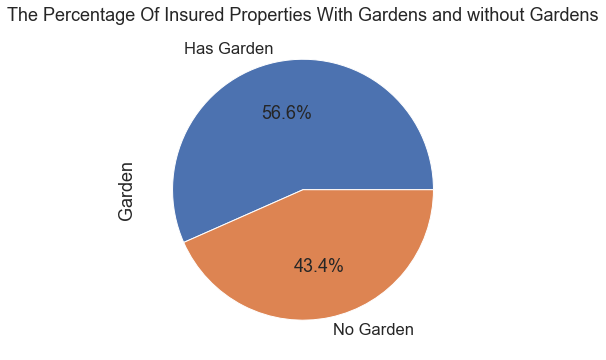

In [7]:
# univariate 'Garden' plot 
plt.figure(figsize=(9,6))
sns.set_theme(font_scale=1.5)
data['Garden'].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("The Percentage Of Insured Properties With Gardens and without Gardens")


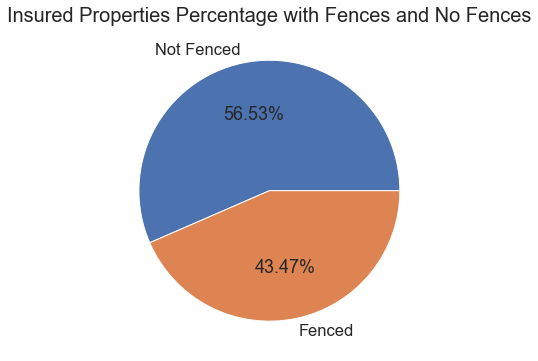

In [8]:
# plot a pie chart of insured properties with fence and without fence
Building_fenced = data['Building Fenced'].value_counts()

plt.figure(figsize=(9,6))
sns.set(font_scale=1.5)
plt.pie(Building_fenced.values, labels=Building_fenced.index, autopct= '%1.2f%%')
plt.title('Insured Properties Percentage with Fences and No Fences',fontsize = 20)

plt.show()

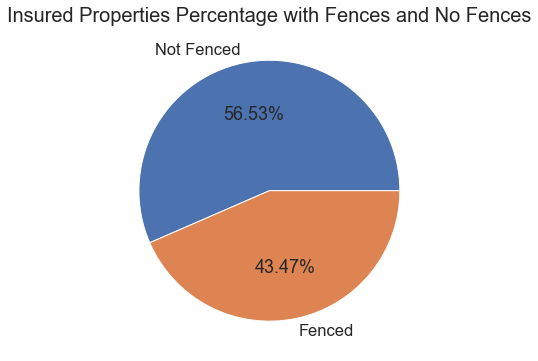

In [9]:
# plot a pie chart of insured properties with fence and without fence
Building_fenced = data['Building Fenced'].value_counts()

plt.figure(figsize=(9,6))
sns.set(font_scale=1.5)
plt.pie(Building_fenced.values, labels=Building_fenced.index, autopct= '%1.2f%%')
plt.title('Insured Properties Percentage with Fences and No Fences',fontsize = 20)

plt.show()

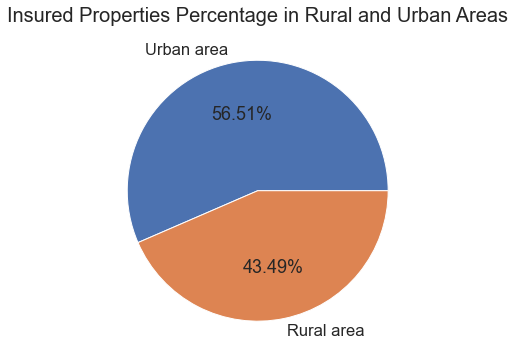

In [10]:
# plot a pie chart of insured properties with fence and without fence
Settlement = data['Settlement'].value_counts()

plt.figure(figsize=(9,6))
sns.set(font_scale=1.5)
plt.pie(Settlement.values, labels=Settlement.index, autopct= '%1.2f%%')
plt.title('Insured Properties Percentage in Rural and Urban Areas',fontsize = 20)

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Building Dimension'>

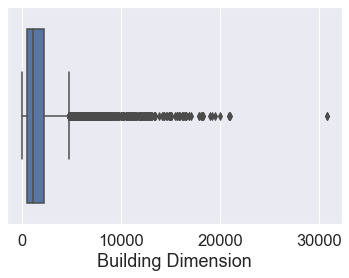

In [11]:
sns.boxplot(data['Building Dimension'])

In [18]:
dimension_mean = data['Building Dimension'].mean()
dimension_std = data['Building Dimension'].std()


(data['Building Dimension']-dimension_mean) / dimension_std

0       -0.676492
1       -0.588042
2       -0.541606
3        0.451247
4       -0.504014
           ...   
10190   -0.000291
10191   -0.000291
10192   -0.000291
10193   -0.000291
10194   -0.000291
Name: Building Dimension, Length: 10195, dtype: float64

In [12]:
# plot insured period of residential and non residential properties 

Groupby = pd.DataFrame(data.groupby('Insurance Period')['Residential'].value_counts(),
                      
                      )
Groupby.rename(columns={'Residential':'Counts'},inplace=True)
Groupby.reset_index(inplace=True)

residential = Groupby[Groupby['Residential'] == 1]
non_residential = Groupby[Groupby['Residential'] == 0]


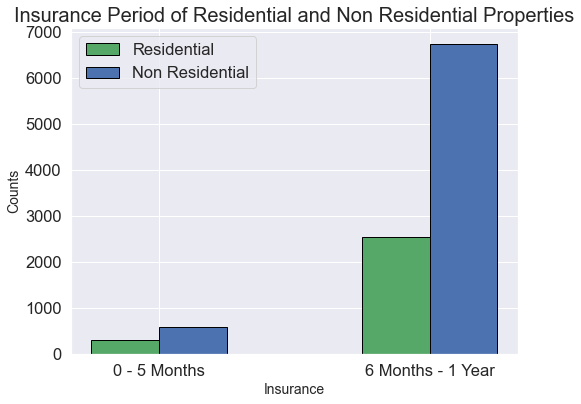

In [13]:
n = len(residential['Counts'])
r = np.arange(n)
width = 0.25

plt.figure(figsize=(8,6))
sns.set_theme(font_scale=1.5)
plt.bar(r,residential['Counts'], color='g',
       width = width, edgecolor = 'black',label='Residential')
plt.bar(r + width,non_residential['Counts'], color='b',
       width = width, edgecolor = 'black',label='Non Residential')

plt.xlabel('Insurance',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Insurance Period of Residential and Non Residential Properties',fontsize = 20)

plt.xticks(r + width/2,['0 - 5 Months','6 Months - 1 Year'])
plt.legend()

plt.show()

<AxesSubplot:>

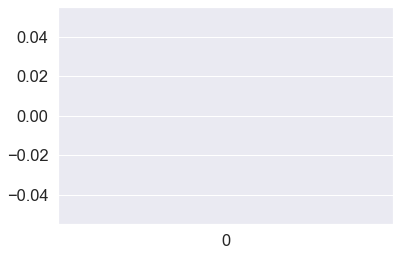

In [14]:
sns.barplot()

In [15]:
# Scatter plot of the building dimensions of insrance properties in years of observation 
# Also between rural and urban areas 


plt.figure(figsize=(10,6))
sns.swarmplot(data=df,  x='Settlement', y= 'Building Dimension')

NameError: name 'df' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
sns.histplot(df['Date_of_Occupancy'])